In [ ]:
# DON"T FORGET TO REMOVE HUMIDITY OVER 100
# And check against the example notebook

In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress


# Import keys
from config import w_api_key
from config import gkey

# Import citipy module
# Be sure to be in PythonData where this installed to have this work
from citipy import citipy

# Output file
output_data_file = "output_data/cities.csv"

# Set range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


In [43]:
# List for holding lat_lngs and cities
coordinates = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
coordinates = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for coord in coordinates:
    city = citipy.nearest_city(coord[0], coord[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

638

In [45]:
# cities

In [47]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
farenheit = "units=imperial" #imperial
city = cities[2]


# Build query URL
query_url = url + "appid=" + w_api_key + "&q=" + city + "&units=imperial"
# Hooray!  I'm talking to the data source and my call is working.

In [48]:
# Ok how am I getting information out of the json/results?
city_data_test = requests.get(query_url).json()
city_data_test

{'coord': {'lon': 102.2655, 'lat': -3.8004},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 75.63,
  'feels_like': 79.34,
  'temp_min': 75.63,
  'temp_max': 75.63,
  'pressure': 1008,
  'humidity': 77,
  'sea_level': 1008,
  'grnd_level': 1006},
 'visibility': 10000,
 'wind': {'speed': 5.14, 'deg': 40},
 'clouds': {'all': 91},
 'dt': 1612816625,
 'sys': {'country': 'ID', 'sunrise': 1612826266, 'sunset': 1612870358},
 'timezone': 25200,
 'id': 1649150,
 'name': 'Bengkulu',
 'cod': 200}

In [49]:
# Set up dataframe to hold data from Open Weather

weather_data = pd.DataFrame({
    "City": cities
})

# Add empty columns to fill
weather_data["Lat"] = ""
weather_data["Long"] = ""
weather_data["Max Temp"] = ""
weather_data["Humidity"] = ""
weather_data["Cloudiness"] = ""
weather_data["Wind Speed"] = ""
weather_data["Country"] = ""
weather_data["Date"] = ""

weather_data

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port alfred,,,,,,,,
1,petropavlovsk-kamchatskiy,,,,,,,,
2,bengkulu,,,,,,,,
3,ayr,,,,,,,,
4,jamestown,,,,,,,,
...,...,...,...,...,...,...,...,...,...
633,lermontovka,,,,,,,,
634,ruatoria,,,,,,,,
635,hengshan,,,,,,,,
636,anchorage,,,,,,,,


In [50]:
# Set up a for loop to go through the weather_data dataframe
# to look for data for each city
# params = {degrees = farenheit}

base_url = url + "appid=" + w_api_key + "&units=imperial" + "&q=" 

for index, row in weather_data.iterrows():
    
    # Get the city name from the df
    name = row["City"]
    
    # Add city to url
    print(f"Retrieving data for {index}: {name}.")
    response = requests.get(base_url + name).json()
    
#     print(response)
    
    # Extract data
    results = response
#     print(results["coord"]["lat"])
    
    try:
#         print("Proof of entry into try block")
        weather_data.loc[index, "Lat"] = results["coord"]["lat"]
        weather_data.loc[index, "Long"] = results["coord"]["lon"]
        weather_data.loc[index, "Max Temp"] = results["main"]["temp_max"]
        weather_data.loc[index, "Humidity"] = results["main"]["humidity"]
        weather_data.loc[index, "Cloudiness"] = results["clouds"]["all"]
        weather_data.loc[index, "Wind Speed"] = results["wind"]["speed"]
        weather_data.loc[index, "Country"] = results["sys"]["country"]
        weather_data.loc[index, "Date"] = results["dt"]
        
        print(f"Retrieving results for {name}. Loading stats.")
        
    except KeyError:
        print(f"{name} not found.")
        weather_data.loc[index, "Lat"] = np.nan
        pass
    
    time.sleep(1)


Retrieving data for 0: port alfred.
Retrieving results for port alfred. Loading stats.
Retrieving data for 1: petropavlovsk-kamchatskiy.
Retrieving results for petropavlovsk-kamchatskiy. Loading stats.
Retrieving data for 2: bengkulu.
Retrieving results for bengkulu. Loading stats.
Retrieving data for 3: ayr.
Retrieving results for ayr. Loading stats.
Retrieving data for 4: jamestown.
Retrieving results for jamestown. Loading stats.
Retrieving data for 5: amderma.
amderma not found.
Retrieving data for 6: srednekolymsk.
Retrieving results for srednekolymsk. Loading stats.
Retrieving data for 7: areosa.
Retrieving results for areosa. Loading stats.
Retrieving data for 8: avarua.
Retrieving results for avarua. Loading stats.
Retrieving data for 9: saint-philippe.
Retrieving results for saint-philippe. Loading stats.
Retrieving data for 10: krasnaya polyana.
Retrieving results for krasnaya polyana. Loading stats.
Retrieving data for 11: alofi.
Retrieving results for alofi. Loading stats.


Retrieving data for 101: saint-jean-de-dieu.
saint-jean-de-dieu not found.
Retrieving data for 102: bloomfield.
Retrieving results for bloomfield. Loading stats.
Retrieving data for 103: sao joao da barra.
Retrieving results for sao joao da barra. Loading stats.
Retrieving data for 104: dobson.
Retrieving results for dobson. Loading stats.
Retrieving data for 105: qaanaaq.
Retrieving results for qaanaaq. Loading stats.
Retrieving data for 106: tuktoyaktuk.
Retrieving results for tuktoyaktuk. Loading stats.
Retrieving data for 107: indiana.
Retrieving results for indiana. Loading stats.
Retrieving data for 108: homer.
Retrieving results for homer. Loading stats.
Retrieving data for 109: nador.
Retrieving results for nador. Loading stats.
Retrieving data for 110: bethel.
Retrieving results for bethel. Loading stats.
Retrieving data for 111: banda aceh.
Retrieving results for banda aceh. Loading stats.
Retrieving data for 112: hermanus.
Retrieving results for hermanus. Loading stats.
Retr

Retrieving data for 200: nizhneyansk.
nizhneyansk not found.
Retrieving data for 201: tuatapere.
Retrieving results for tuatapere. Loading stats.
Retrieving data for 202: saskylakh.
Retrieving results for saskylakh. Loading stats.
Retrieving data for 203: media luna.
Retrieving results for media luna. Loading stats.
Retrieving data for 204: sambava.
Retrieving results for sambava. Loading stats.
Retrieving data for 205: aflu.
aflu not found.
Retrieving data for 206: puerto ayora.
Retrieving results for puerto ayora. Loading stats.
Retrieving data for 207: matara.
Retrieving results for matara. Loading stats.
Retrieving data for 208: caravelas.
Retrieving results for caravelas. Loading stats.
Retrieving data for 209: conakry.
Retrieving results for conakry. Loading stats.
Retrieving data for 210: bilibino.
Retrieving results for bilibino. Loading stats.
Retrieving data for 211: samusu.
samusu not found.
Retrieving data for 212: tonekabon.
Retrieving results for tonekabon. Loading stats.

Retrieving data for 303: visnes.
Retrieving results for visnes. Loading stats.
Retrieving data for 304: wani.
Retrieving results for wani. Loading stats.
Retrieving data for 305: old saybrook.
Retrieving results for old saybrook. Loading stats.
Retrieving data for 306: puerto escondido.
Retrieving results for puerto escondido. Loading stats.
Retrieving data for 307: wanaka.
Retrieving results for wanaka. Loading stats.
Retrieving data for 308: zaranj.
Retrieving results for zaranj. Loading stats.
Retrieving data for 309: isangel.
Retrieving results for isangel. Loading stats.
Retrieving data for 310: qiongshan.
Retrieving results for qiongshan. Loading stats.
Retrieving data for 311: ginda.
Retrieving results for ginda. Loading stats.
Retrieving data for 312: chifeng.
Retrieving results for chifeng. Loading stats.
Retrieving data for 313: kaka.
Retrieving results for kaka. Loading stats.
Retrieving data for 314: grand-lahou.
Retrieving results for grand-lahou. Loading stats.
Retrieving

Retrieving data for 405: paamiut.
Retrieving results for paamiut. Loading stats.
Retrieving data for 406: samalaeulu.
samalaeulu not found.
Retrieving data for 407: banganapalle.
Retrieving results for banganapalle. Loading stats.
Retrieving data for 408: north bend.
Retrieving results for north bend. Loading stats.
Retrieving data for 409: provideniya.
Retrieving results for provideniya. Loading stats.
Retrieving data for 410: ananas.
Retrieving results for ananas. Loading stats.
Retrieving data for 411: hervey bay.
Retrieving results for hervey bay. Loading stats.
Retrieving data for 412: coffs harbour.
Retrieving results for coffs harbour. Loading stats.
Retrieving data for 413: seoni malwa.
Retrieving results for seoni malwa. Loading stats.
Retrieving data for 414: nyurba.
Retrieving results for nyurba. Loading stats.
Retrieving data for 415: marawi.
Retrieving results for marawi. Loading stats.
Retrieving data for 416: evensk.
Retrieving results for evensk. Loading stats.
Retrievi

Retrieving data for 506: sawakin.
Retrieving results for sawakin. Loading stats.
Retrieving data for 507: nishihara.
Retrieving results for nishihara. Loading stats.
Retrieving data for 508: ust-karsk.
Retrieving results for ust-karsk. Loading stats.
Retrieving data for 509: phan thiet.
Retrieving results for phan thiet. Loading stats.
Retrieving data for 510: narsaq.
Retrieving results for narsaq. Loading stats.
Retrieving data for 511: coquimbo.
Retrieving results for coquimbo. Loading stats.
Retrieving data for 512: clearlake.
Retrieving results for clearlake. Loading stats.
Retrieving data for 513: mandera.
Retrieving results for mandera. Loading stats.
Retrieving data for 514: paveh.
Retrieving results for paveh. Loading stats.
Retrieving data for 515: presidencia roque saenz pena.
Retrieving results for presidencia roque saenz pena. Loading stats.
Retrieving data for 516: komsomolskiy.
Retrieving results for komsomolskiy. Loading stats.
Retrieving data for 517: kerema.
Retrieving

Retrieving data for 605: khasan.
Retrieving results for khasan. Loading stats.
Retrieving data for 606: itarema.
Retrieving results for itarema. Loading stats.
Retrieving data for 607: bakhtiyarpur.
Retrieving results for bakhtiyarpur. Loading stats.
Retrieving data for 608: vao.
Retrieving results for vao. Loading stats.
Retrieving data for 609: kichera.
Retrieving results for kichera. Loading stats.
Retrieving data for 610: yagodnoye.
Retrieving results for yagodnoye. Loading stats.
Retrieving data for 611: lenki.
lenki not found.
Retrieving data for 612: dipkarpaz.
dipkarpaz not found.
Retrieving data for 613: vestmanna.
Retrieving results for vestmanna. Loading stats.
Retrieving data for 614: hirara.
Retrieving results for hirara. Loading stats.
Retrieving data for 615: watrous.
Retrieving results for watrous. Loading stats.
Retrieving data for 616: gambela.
Retrieving results for gambela. Loading stats.
Retrieving data for 617: castellammare del golfo.


KeyboardInterrupt: 

In [51]:
weather_data.head(100)

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port alfred,-33.5906,26.891,66.99,88,58,1.99,ZA,1612816530
1,petropavlovsk-kamchatskiy,53.0452,158.648,14,85,20,6.71,RU,1612816499
2,bengkulu,-3.8004,102.266,75.63,77,91,5.14,ID,1612816799
3,ayr,55.4627,-4.6339,30.99,74,0,8.05,GB,1612816800
4,jamestown,42.097,-79.2353,23,58,90,5.99,US,1612816801
...,...,...,...,...,...,...,...,...,...
95,santo andre,-23.6639,-46.5383,71.6,60,75,16.11,BR,1612816905
96,pushkino,56.0172,37.8667,-0.4,85,0,2.24,RU,1612816906
97,saryshagan,NaN,,,,,,,
98,mount gambier,-37.8333,140.767,48.2,93,0,9.22,AU,1612816887


In [58]:
weather_data.dropna(inplace=True)
weather_data.reset_index(drop=True, inplace=True)
weather_data

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port alfred,-33.5906,26.891,66.99,88,58,1.99,ZA,1612816530
1,petropavlovsk-kamchatskiy,53.0452,158.648,14,85,20,6.71,RU,1612816499
2,bengkulu,-3.8004,102.266,75.63,77,91,5.14,ID,1612816799
3,ayr,55.4627,-4.6339,30.99,74,0,8.05,GB,1612816800
4,jamestown,42.097,-79.2353,23,58,90,5.99,US,1612816801
...,...,...,...,...,...,...,...,...,...
583,lermontovka,,,,,,,,
584,ruatoria,,,,,,,,
585,hengshan,,,,,,,,
586,anchorage,,,,,,,,


In [57]:
# Export weather_data to csv
# Update with full data set later (updated)

weather_data.to_csv("Working_data.csv", index=False)

# weather_data_2 = pd.read_csv("Working_data.csv")
# weather_data_2

In [54]:
# Make a heck ton of scatter plots

ValueError: could not convert string to float: 

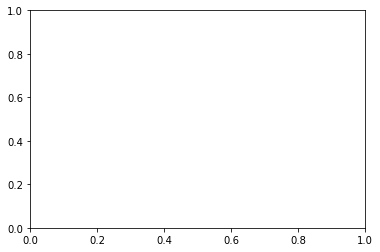

In [55]:
# Temp vs Latitude
x = weather_data["Lat"]
temp_y = weather_data["Max Temp"]

plt.plot(x, temp_y, "bo")

plt.ylabel("Maximum Temperature")
plt.title("City Temperature by Latitude")

plt.show()

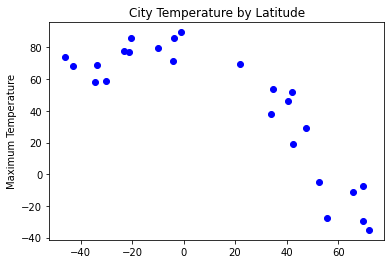

In [18]:
# Temperature vs Latitude
x = weather_data["Lat"]
temp_y = weather_data["Max Temp"]

plt.plot (x, temp_y, "bo")
plt.ylabel("Maximum Temperature")
plt.title("City Temperature by Latitude")
plt.show()

# Why won't my plt.xlabel work????

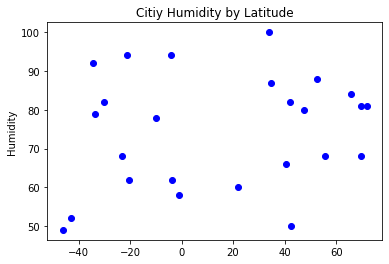

In [19]:
# Humidity vs Latitude
humid_y = weather_data["Humidity"]

plt.plot(x, humid_y, "bo")
plt.ylabel("Humidity")
# plt.xlabel("Latitude")
plt.title("Citiy Humidity by Latitude")
plt.show()

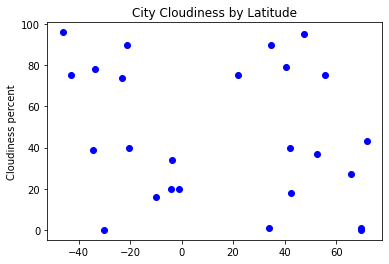

In [20]:
# Cloudiness vs Latitude
cloud_y = weather_data["Cloudiness"]

plt.plot(x, cloud_y, "bo")
plt.ylabel("Cloudiness percent")
plt.title("City Cloudiness by Latitude")
plt.show()

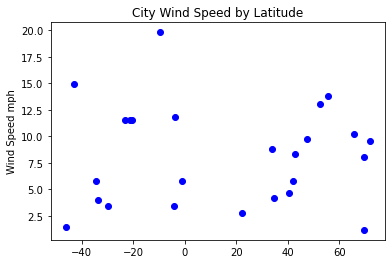

In [21]:
# Wind Speed by Latitude
wind_y = weather_data["Wind Speed"]

plt.plot(x, wind_y, "bo")
plt.ylabel("Wind Speed mph")
plt.title("City Wind Speed by Latitude")
plt.show()

In [22]:
# Separate df by hemispheres
northern_weather = weather_data_2.loc[weather_data["Lat"] >= 0]
northern_weather

southern_weather = weather_data_2.loc[weather_data["Lat"] <= 0]
southern_weather

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bambous virieux,-20.3428,57.7575,86.00,62,40,11.50,MU,1612761728
2,mataura,-46.1927,168.8643,74.17,49,96,1.45,NZ,1612761630
7,atuona,-9.8000,-139.0333,79.41,78,16,19.82,PF,1612761365
11,coquimbo,-29.9533,-71.3436,59.00,82,0,3.44,CL,1612761225
13,rikitea,-23.1203,-134.9692,77.59,68,74,11.54,PF,1612761221
14,brazzaville,-4.2658,15.2832,71.60,94,20,3.44,CG,1612761745
17,port alfred,-33.5906,26.8910,69.01,79,78,4.00,ZA,1612761748
19,hobart,-42.8794,147.3294,68.00,52,75,14.97,AU,1612761114
20,hermanus,-34.4187,19.2345,57.99,92,39,5.79,ZA,1612761365
21,padang,-0.9492,100.3543,89.60,58,20,5.75,ID,1612761452


## Southern Hemisphere Regressions

The correlation between latitude and temperature in the Southern Hemisphere is 0.64


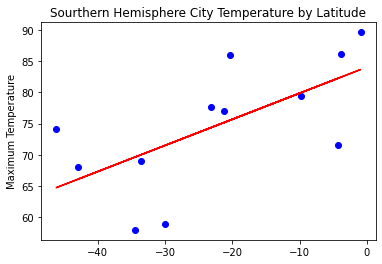

In [33]:
# Let's start with the Southern Hemisphere 

# Southern Temp vs Latitude
south_x = southern_weather["Lat"]
south_temp = southern_weather["Max Temp"]

plt.plot (south_x, south_temp, "bo")

# Calculate the line of best fit and plot on the graph
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_x, south_temp)
regress_values = south_x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Place the line on the graph and annotate
correlation = st.pearsonr(south_x, south_temp)
# Why is this showing so weirdly?
print(f"The correlation between latitude and temperature in the Southern Hemisphere is {round(correlation[0],2)}")

plt.plot(south_x, regress_values, "r-")
# plt.annotate(line_eq,(-40,285),fontsize=15,color="green")

plt.ylabel("Maximum Temperature")
# plt.xlabel("Latitude")
plt.title("Sourthern Hemisphere City Temperature by Latitude")

plt.show()

The correlation between latitude and humidity in the Southern Hemisphere is 0.2


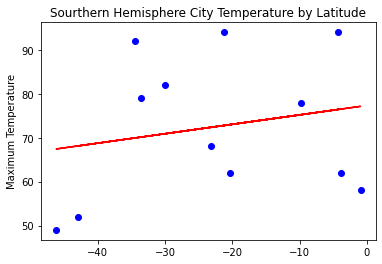

In [34]:
# Southern Humidity vs Latitude
south_x = southern_weather["Lat"]
south_humid = southern_weather["Humidity"]

plt.plot (south_x, south_humid, "bo")

# Calculate the line of best fit and plot on the graph
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_x, south_humid)
regress_values = south_x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Place the line on the graph and annotate
correlation = st.pearsonr(south_x, south_humid)
# Why is this showing so weirdly?
print(f"The correlation between latitude and humidity in the Southern Hemisphere is {round(correlation[0],2)}")

plt.plot(south_x, regress_values, "r-")
# plt.annotate(line_eq,(-40,285),fontsize=15,color="green")

plt.ylabel("Maximum Temperature")
# plt.xlabel("Latitude")
plt.title("Sourthern Hemisphere City Humidity by Latitude")

plt.show()

The correlation between latitude and cloudiness in the Southern Hemisphere is -0.6


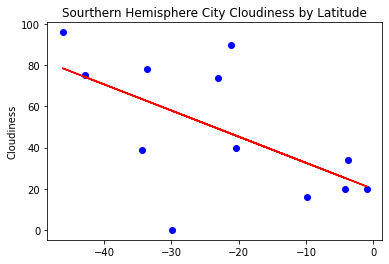

In [35]:
# Southern cloudiness vs Latitude
south_x = southern_weather["Lat"]
south_cloud = southern_weather["Cloudiness"]

plt.plot (south_x, south_cloud, "bo")

# Calculate the line of best fit and plot on the graph
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_x, south_cloud)
regress_values = south_x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Place the line on the graph and annotate
correlation = st.pearsonr(south_x, south_cloud)
# Why is this showing so weirdly?
print(f"The correlation between latitude and cloudiness in the Southern Hemisphere is {round(correlation[0],2)}")

plt.plot(south_x, regress_values, "r-")
# plt.annotate(line_eq,(-40,285),fontsize=15,color="green")

plt.ylabel("Cloudiness")
# plt.xlabel("Latitude")
plt.title("Sourthern Hemisphere City Cloudiness by Latitude")

plt.show()

The correlation between latitude and wind speed in the Southern Hemisphere is 0.23


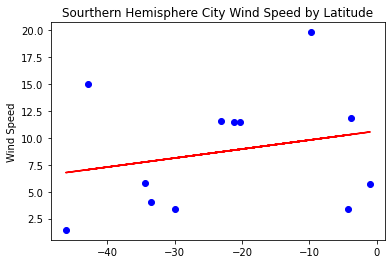

In [36]:
# Southern Wind Speed vs Latitude
south_x = southern_weather["Lat"]
south_wind = southern_weather["Wind Speed"]

plt.plot (south_x, south_wind, "bo")

# Calculate the line of best fit and plot on the graph
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_x, south_wind)
regress_values = south_x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Place the line on the graph and annotate
correlation = st.pearsonr(south_x, south_wind)
# Why is this showing so weirdly?
print(f"The correlation between latitude and wind speed in the Southern Hemisphere is {round(correlation[0],2)}")

plt.plot(south_x, regress_values, "r-")
# plt.annotate(line_eq,(-40,285),fontsize=15,color="green")

plt.ylabel("Wind Speed")
# plt.xlabel("Latitude")
plt.title("Sourthern Hemisphere City Wind Speed by Latitude")

plt.show()

## Northern Hemispere Regressions

The correlation between latitude and temperature in the Northern Hemisphere is -0.92


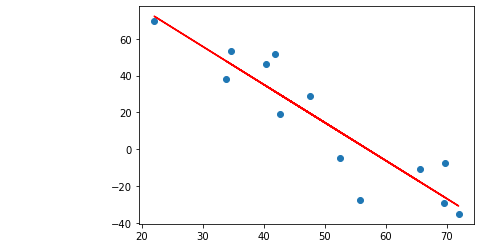

In [28]:
# Northern Temp vs Latitude
north_x = northern_weather["Lat"]
north_temp = northern_weather["Max Temp"]

correlation = st.pearsonr(north_x, north_temp)
print(f"The correlation between latitude and temperature in the Northern Hemisphere is {round(correlation[0],2)}")

# Calculate the line of best fit and plot on the graph
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_x, north_temp)
regress_values = north_x * slope + intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(north_x, north_temp)
plt.plot(north_x, regress_values, "r-")
plt.annotate(f'Correlation:  {round(rvalue, 2)}', (-2,-15), fontsize=14, color='#1e4bae')
plt.annotate(f'Linear Reg:  {line_eq}', (-2,-30), fontsize=14, color='#1e4bae')

plt.show()

The correlation between latitude and humidity in the Northern Hemisphere is 0.11


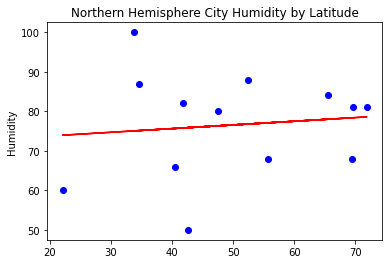

In [40]:
# Northern Humidity vs Latitude
north_x = northern_weather["Lat"]
north_humid = northern_weather["Humidity"]

plt.plot (north_x, north_humid, "bo")

# Calculate the line of best fit and plot on the graph
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_x, north_humid)
regress_values = north_x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Place the line on the graph and annotate
correlation = st.pearsonr(north_x, north_humid)
# Why is this showing so weirdly?
print(f"The correlation between latitude and humidity in the Northern Hemisphere is {round(correlation[0],2)}")

plt.plot(north_x, regress_values, "r-")
# plt.annotate(line_eq,(-40,285),fontsize=15,color="green")

plt.ylabel("Humidity")
# plt.xlabel("Latitude")
plt.title("Northern Hemisphere City Humidity by Latitude")

plt.show()

The correlation between latitude and cloudiness in the Northern Hemisphere is -0.44


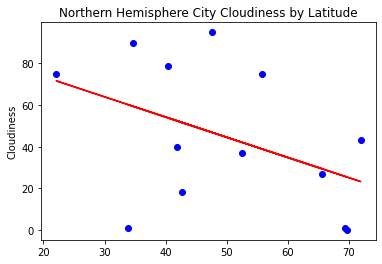

In [41]:
# Northern Cloudiness vs Latitude
north_x = northern_weather["Lat"]
north_cloud = northern_weather["Cloudiness"]

plt.plot (north_x, north_cloud, "bo")

# Calculate the line of best fit and plot on the graph
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_x, north_cloud)
regress_values = north_x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Place the line on the graph and annotate
correlation = st.pearsonr(north_x, north_cloud)
# Why is this showing so weirdly?
print(f"The correlation between latitude and cloudiness in the Northern Hemisphere is {round(correlation[0],2)}")

plt.plot(north_x, regress_values, "r-")
# plt.annotate(line_eq,(-40,285),fontsize=15,color="green")

plt.ylabel("Cloudiness")
# plt.xlabel("Latitude")
plt.title("Northern Hemisphere City Cloudiness by Latitude")

plt.show()

The correlation between latitude and wind speed in the Northern Hemisphere is 0.3


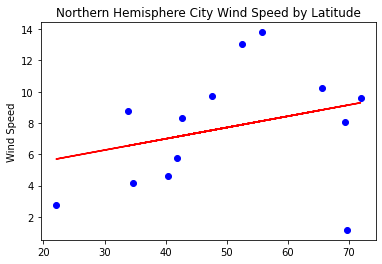

In [42]:
# Northern Wind Speed vs Latitude
north_x = northern_weather["Lat"]
north_wind = northern_weather["Wind Speed"]

plt.plot (north_x, north_wind, "bo")

# Calculate the line of best fit and plot on the graph
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_x, north_wind)
regress_values = north_x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Place the line on the graph and annotate
correlation = st.pearsonr(north_x, north_wind)
# Why is this showing so weirdly?
print(f"The correlation between latitude and wind speed in the Northern Hemisphere is {round(correlation[0],2)}")

plt.plot(north_x, regress_values, "r-")
# plt.annotate(line_eq,(-40,285),fontsize=15,color="green")

plt.ylabel("Wind Speed")
# plt.xlabel("Latitude")
plt.title("Northern Hemisphere City Wind Speed by Latitude")

plt.show()

In [ ]:
# Be sure to go back and fix the xlabel issue and add a line analyzing each chart

The correlation between latitude and temperature in the Southern Hemisphere is 0.64


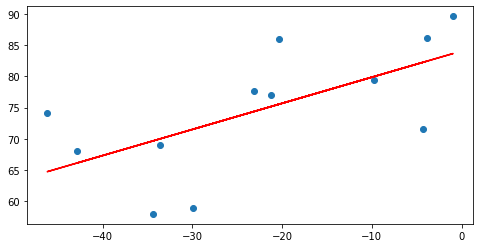

In [32]:
# Extra stuff?



correlation = st.pearsonr(south_x, south_temp)
# Why is this showing so weirdly?
print(f"The correlation between latitude and temperature in the Southern Hemisphere is {round(correlation[0],2)}")

# Calculate the line of best fit and plot on the graph
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_x, south_temp)
regress_values = south_x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(8, 4))
plt.scatter(south_x, south_temp)
plt.plot(south_x, regress_values, "r-")
# plt.annotate(line_eq,(-40,285),fontsize=15,color="green")
# The above annotation was making the weird